# Homework - pupil data analysis
By Anna Braun

## Load data

In [1]:
import pandas
import matplotlib.pyplot as plt

In [2]:
data = pandas.read_csv("ET_pupil_clip_2.csv", header=0)
data

,time_s,diameter
0,0.000000,92.562576
1,0.030528,92.486251
2,0.061056,92.433100
3,0.091584,92.433100
4,0.122112,92.433100
...,...,...
1852,56.537969,101.922443
1853,56.568497,102.006041
1854,56.599025,102.114198
1855,56.629553,102.234511


## Get baseline
The first second of the recording is from the participant’s calm state. Thus, it can be used to calculate the baseline. The baseline is the mean pupil size in this range. Calculating the baseline is needed to normalize the data.

In [3]:
first_second = data.head(33)
first_second

,time_s,diameter
0,0.000000,92.562576
1,0.030528,92.486251
2,0.061056,92.433100
3,0.091584,92.433100
4,0.122112,92.433100
5,0.152640,92.449050
6,0.183168,92.512947
7,0.213696,92.599047
8,0.244225,92.698824
9,0.274753,92.801604


In [4]:
baseline = first_second['diameter'].mean()
baseline

92.91528250212123

## Data Normalization
There are multiple ways to normalize eye tracking data, especially pupil size. Using the subtractive baseline correction method seems to be the best in cases where the true pupil size in known. However, the given dataset contains the vertical diameter of the pupil in pixels. This means that the true pupil size is not known. In this case, the Percentage change in pupil size (short: PCPS) is the most favorable normalization method to use.

Calculation of PCSP:

(pupil size – baseline)/baseline

In [5]:
data["normalized_diameter"] = (data["diameter"] - baseline ) / baseline
data

,time_s,diameter,normalized_diameter
0,0.000000,92.562576,-0.003796
1,0.030528,92.486251,-0.004617
2,0.061056,92.433100,-0.005189
3,0.091584,92.433100,-0.005189
4,0.122112,92.433100,-0.005189
...,...,...,...
1852,56.537969,101.922443,0.096939
1853,56.568497,102.006041,0.097839
1854,56.599025,102.114198,0.099003
1855,56.629553,102.234511,0.100298


## Visualization
Creating scatter plots to visualize the normalized versus unnormalized data.

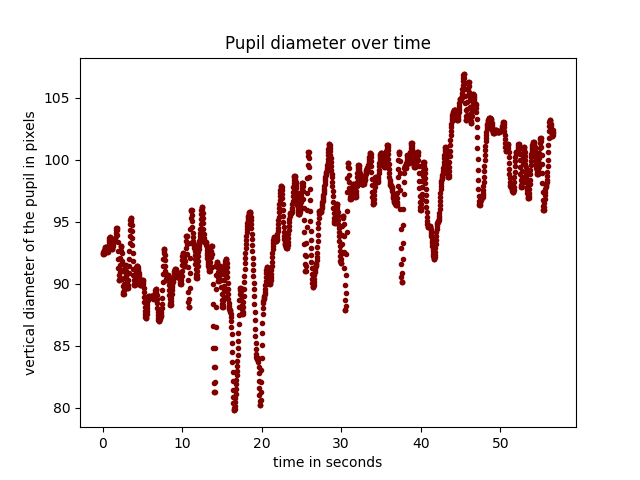

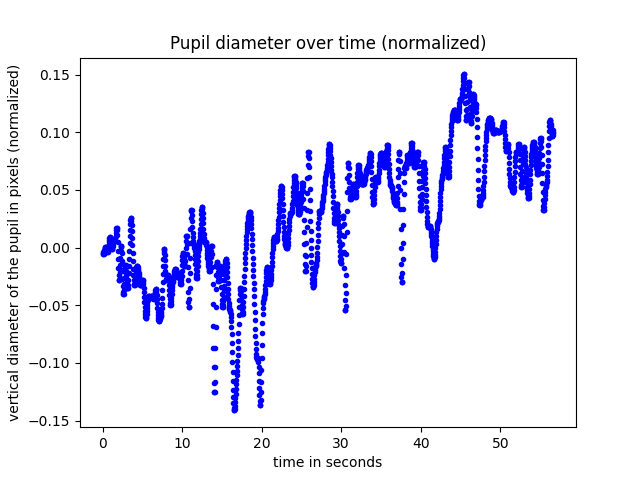

In [6]:
plt.scatter(data["time_s"], data["diameter"], c = 'maroon', cmap='Spectral', marker =".",)
plt.title('Pupil diameter over time')
plt.xlabel("time in seconds")
plt.ylabel("vertical diameter of the pupil in pixels")
plt.show()

plt.scatter(data["time_s"], data["normalized_diameter"], c = 'blue', cmap='Spectral', marker =".",)
plt.title('Pupil diameter over time (normalized)')
plt.xlabel("time in seconds")
plt.ylabel("vertical diameter of the pupil in pixels (normalized)")
plt.show()



# Calculating metrics
Using the normalized data, the average pupil size and standard deviation from the pupil size were calculated from 5 second intervals after the baseline period (i.e. between 1- 6 s, 6 - 11s, 11 - 16 s...). The results were visulaized in two bar charts.

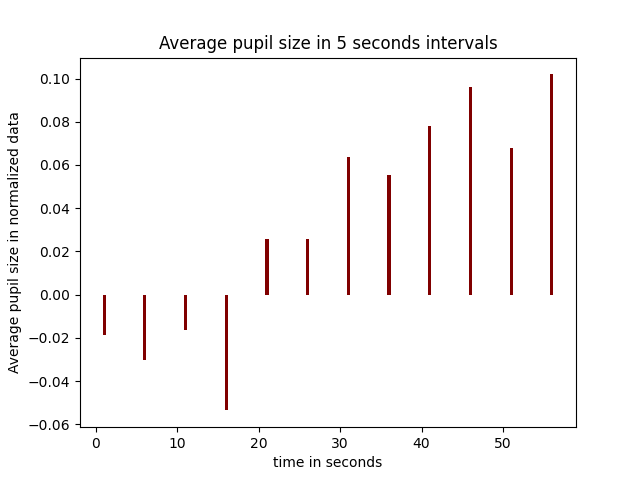

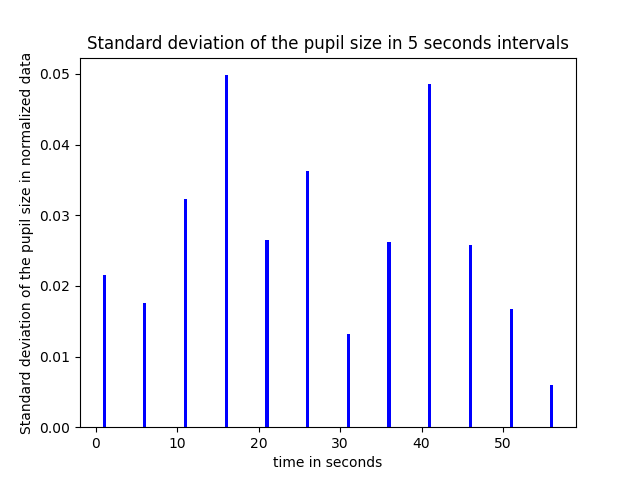

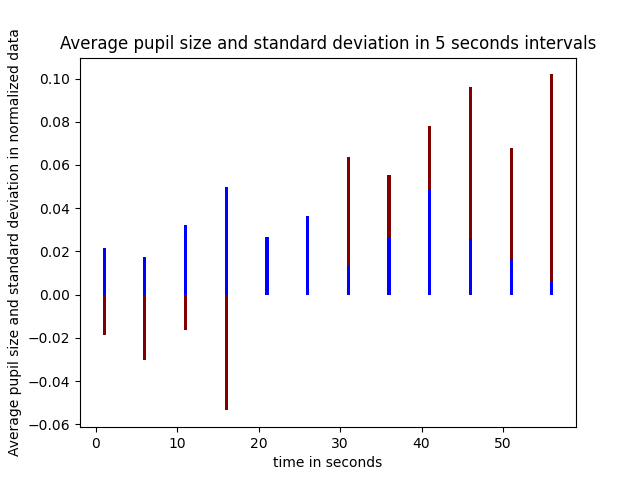

In [7]:
metrics_normalized_data = pandas.DataFrame()
lower_limit = 1
upper_limit = 6
for x in data["time_s"]:
    if x > lower_limit and x < upper_limit:
        time_range = data[data["time_s"].between(lower_limit, upper_limit)]
        mean = time_range["normalized_diameter"].mean()
        standard_deviation = time_range["normalized_diameter"].std()
        #print("Mean Pupil size in range from ", lower_limit, " to ", upper_limit, " is: ", mean ,". Standard Deviation in range from ", lower_limit, " to ", upper_limit, " is: ", standard_deviation ) 
        add_row = pandas.DataFrame([{'time_s': lower_limit, 'mean': mean, 'standard_deviation': standard_deviation}])
        metrics_normalized_data = pandas.concat([metrics_normalized_data, add_row])
        x += 5
        lower_limit = lower_limit + 5
        upper_limit = upper_limit + 5
        

plt.bar(metrics_normalized_data["time_s"], metrics_normalized_data["mean"], color ='maroon', width = 0.4)
plt.xlabel("time in seconds")
plt.ylabel("Average pupil size in normalized data")
plt.title("Average pupil size in 5 seconds intervals")
plt.show()


plt.bar(metrics_normalized_data["time_s"], metrics_normalized_data["standard_deviation"], color ='blue', width = 0.4)
plt.xlabel("time in seconds")
plt.ylabel("Standard deviation of the pupil size in normalized data")
plt.title("Standard deviation of the pupil size in 5 seconds intervals")
plt.show()


plt.bar(metrics_normalized_data["time_s"], metrics_normalized_data["mean"], color ='maroon', width = 0.4)
plt.bar(metrics_normalized_data["time_s"], metrics_normalized_data["standard_deviation"], color ='blue', width = 0.4)
plt.xlabel("time in seconds")
plt.ylabel("Average pupil size and standard deviation in normalized data")
plt.title("Average pupil size and standard deviation in 5 seconds intervals")
plt.show()



# Exact values
The table underneath shows the exact values for the average pupil size and standard deviation from 5 second intervals after the baseline period.

In [8]:
metrics_normalized_data

,time_s,mean,standard_deviation
0,1,-0.018807,0.021606
0,6,-0.030326,0.017522
0,11,-0.016529,0.032332
0,16,-0.053589,0.049816
0,21,0.025797,0.026491
0,26,0.025524,0.036235
0,31,0.063530,0.013242
0,36,0.055291,0.026196
0,41,0.077891,0.048584
0,46,0.096156,0.025720
